In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
from matplotlib.ticker import IndexLocator
most_recent_date = session.query(func.max(measurement.date)).scalar()
most_recent_date

'2017-08-23'

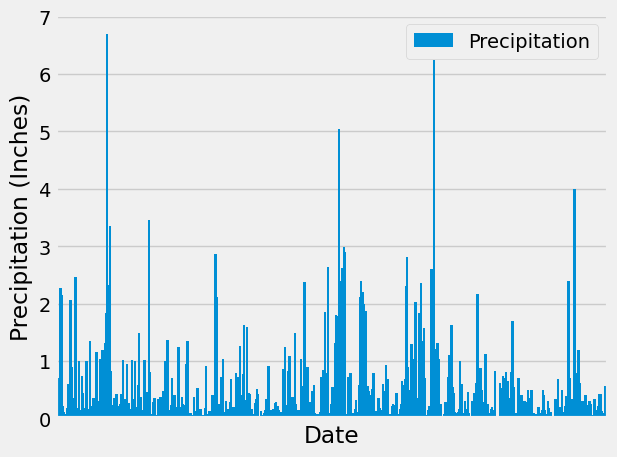

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
most_recent_date=dt.date(2017, 8 ,23)
year_ago= most_recent_date - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
last_12 = session.query(measurement.prcp, measurement.date).\
    filter(measurement.date <= most_recent_date ).\
    filter(measurement.date >= year_ago).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_df = pd.DataFrame(last_12, columns=['Precipitation', 'Date'])
# Sort the dataframe by date
last_12_df = last_12_df.sort_values(by='Date')
last_12_df = last_12_df.dropna(how='any')
last_12_df = last_12_df.drop(last_12_df[last_12_df['Precipitation'] == 0].index)

# Use Pandas Plotting with Matplotlib to plot the data
#last_12=pd.DataFrame(last_12_df, columns=['Precipitation'])
ax=last_12_df.plot.bar(width = 5)
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
ax.set_xticks([])
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_stat=last_12_df["Precipitation"].agg(['mean','median','var','std','sem'])
sum_stat


mean      0.312363
median    0.100000
var       0.332677
std       0.576781
sem       0.017031
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(station.id)).scalar()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
print(most_active)

[(54.0, 85.0, 71.66378066378067)]


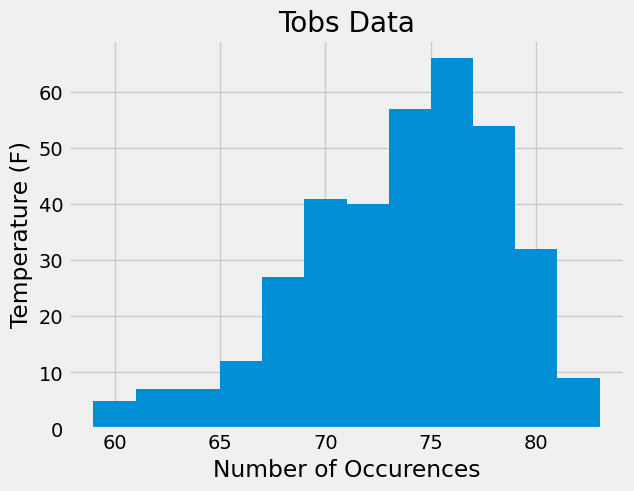

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_recent_date2 = session.query(func.max(measurement.date)).\
                    filter(measurement.station == 'USC00519281').scalar()
most_recent_date2=dt.date(2017,8,18)
year_ago2= most_recent_date2 - dt.timedelta(days=365)
temp_last_12 = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date <= most_recent_date2 ).\
    filter(measurement.date >= year_ago2).all()
station_df=pd.DataFrame(temp_last_12, columns=['Temperature'])
station_df.hist(bins=12)
plt.xlabel('Number of Occurences')
plt.ylabel('Temperature (F)')
plt.title('Tobs Data')
plt.show()

# Close session

In [16]:
# Close Session
session.close()